In [3]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from urllib.request import urlopen
import json


In [4]:
#File paths made to read external documents 
file_path1 = 'GHG.csv'
file_path2 = 'NOx.csv'
file_path3 = 'PM2.5.csv'
file_path4 = 'PM10.csv'

df_GHG = pd.read_csv(file_path1, sep = ';',encoding='ISO-8859-1')
df_NOx = pd.read_csv(file_path2, sep = ';',encoding='ISO-8859-1')
df_PM_2_5 = pd.read_csv(file_path3, sep = ';',encoding='ISO-8859-1')
df_PM_10 = pd.read_csv(file_path4, sep = ';',encoding='ISO-8859-1')

# The file had an incorrect delimiter which caused a ParserError,
# this is solved by adding sep=';' when reading the file. 
# This file also gave some UnicodeDecodeErorr, this is solved 
# by using encoding='ISO-8859-1'



In [5]:
# Filter PM10 dataset

for i in range(30, 45):
    df_PM_10.drop(i, axis=0, inplace=True)

#Replace commas with nothing
df_PM_10['2019'] = df_PM_10['2019'].str.replace(',', '').astype(float)
df_PM_10['2020'] = df_PM_10['2020'].str.replace(',', '').astype(float)

df_PM_10.head()

,PM10,2019,2020
0,Belgium,27438.0,25513.0
1,Bulgaria,44091.0,44525.0
2,Czechia,40567.0,37402.0
3,Denmark,23350.0,22412.0
4,Germany,195887.0,182126.0


In [6]:
# Filter code for PM2.5 data

for i in range(30, 45):
    df_PM_2_5.drop(i, axis=0, inplace=True)

#Replace commas with nothing
df_PM_2_5['2019'] = df_PM_2_5['2019'].str.replace(',', '').astype(float)
df_PM_2_5['2020'] = df_PM_2_5['2020'].str.replace(',', '').astype(float)

df_PM_2_5.head()

,PM2.5,2019,2020
0,Belgium,18248.0,16583.0
1,Bulgaria,29519.0,31359.0
2,Czechia,27315.0,24959.0
3,Denmark,12804.0,11983.0
4,Germany,90213.0,81464.0


In [7]:
#Filtering NOx data

condition = (df_NOx['NOx'] == 'Turkiye')

# Use the boolean condition to drop the rows that meet the condition.
df_NOx = df_NOx[~condition]


#Replace commas with nothing
df_NOx['2019'] = df_NOx['2019'].str.replace(',', '').astype(float)
df_NOx['2020'] = df_NOx['2020'].str.replace(',', '').astype(float)

df_NOx.head()

,NOx,2019,2020
0,Belgium,158542.0,139238.0
1,Bulgaria,91587.0,86581.0
2,Czechia,173719.0,156396.0
3,Denmark,96648.0,89391.0
4,Germany,1107200.0,975646.0


In [8]:
#Filtering GHG data

df_GHG = df_GHG.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2012,2022):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GHG.drop(str(i), axis=1, inplace=True)

for i in range(0, 2):
    df_GHG.drop(i, axis=0, inplace=True)

# Replace commas with periods, then replace periods with nothing
df_GHG['2019'] = df_GHG['2019'].str.replace('.', '').str.replace(',', '.').astype(float)
df_GHG['2020'] = df_GHG['2020'].str.replace('.', '').str.replace(',', '.').astype(float)


df_GHG.head()

,Country,2019,2020
2,Belgium,121677.88,110905.57
3,Bulgaria,54728.68,48459.83
4,Czechia,125394.77,114068.58
5,Denmark,48491.87,43838.10
6,Germany,824634.27,744730.64


Total GHG emissions in 2019 3835270.83
Total GHG emissions in 2020 3460530.15
The percentual change is 9.77 %


Total NOx emissions in 2019 6458840.0
Total NOx emissions in 2020 5797344.0
The percentual change is 10.24 %


Total PM2.5 emissions in 2019 1406101.0
Total PM2.5 emissions in 2020 1337569.0
The percentual change is 4.87 %


Total PM10 emissions in 2019 2129326.0
Total PM10 emissions in 2020 2058684.0
The percentual change is 3.32 %


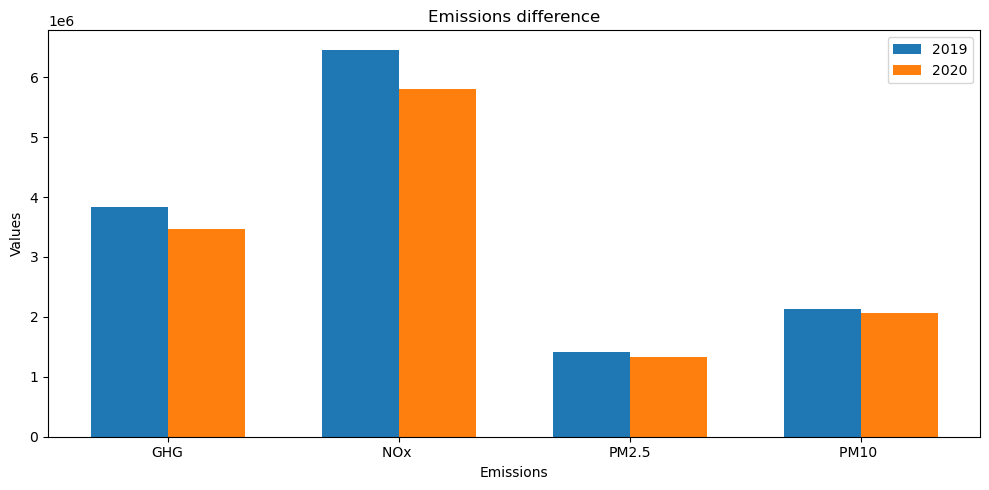

In [10]:
# we first get the total value of an emission in the year 2019 and 2020 of all the data set countries
# we start with GHG emissions and eventually want to do all other emissions as well
# in the end we compare the differences in a bar chart to get to our conclusion of which substance has experienced the biggest decline 


# Getting the sum of the column 2019 and 2020 of the GHG dataset
total_GHG_emissions_2019 = round(df_GHG['2019'].sum(),2)
total_GHG_emissions_2020 = round(df_GHG['2020'].sum(),2)
difference_GHG = 100 - (total_GHG_emissions_2020/total_GHG_emissions_2019) * 100

total_NOx_emissions_2019 = round(df_NOx['2019'].sum(),2)
total_NOx_emissions_2020 = round(df_NOx['2020'].sum(),2)
difference_NOx = 100 - (total_NOx_emissions_2020/total_NOx_emissions_2019) * 100 

total_PM_2_5_emissions_2019 = round(df_PM_2_5['2019'].sum(),2)
total_PM_2_5_emissions_2020 = round(df_PM_2_5['2020'].sum(),2)
difference_PM_2_5 = 100 - (total_PM_2_5_emissions_2020/total_PM_2_5_emissions_2019) * 100

total_PM_10_emissions_2019 = round(df_PM_10['2019'].sum(),2)
total_PM_10_emissions_2020 = round(df_PM_10['2020'].sum(),2)
difference_PM_10 = 100 - (total_PM_10_emissions_2020/total_PM_10_emissions_2019) * 100

#Print the total emissions just to check if the summation code works.
print('Total GHG emissions in 2019', str(total_GHG_emissions_2019))
print('Total GHG emissions in 2020', str(total_GHG_emissions_2020))
print('The percentual change is', round(difference_GHG,2), '%')
print('\n')
print('Total NOx emissions in 2019', str(total_NOx_emissions_2019))
print('Total NOx emissions in 2020', str(total_NOx_emissions_2020))
print('The percentual change is', round(difference_NOx,2), '%')
print('\n')
print('Total PM2.5 emissions in 2019', str(total_PM_2_5_emissions_2019))
print('Total PM2.5 emissions in 2020', str(total_PM_2_5_emissions_2020))
print('The percentual change is', round(difference_PM_2_5,2), '%')
print('\n')
print('Total PM10 emissions in 2019', str(total_PM_10_emissions_2019))
print('Total PM10 emissions in 2020', str(total_PM_10_emissions_2020))
print('The percentual change is', round(difference_PM_10,2), '%')


Emissions = ['GHG', 'NOx ', 'PM2.5', 'PM10 ']
group1_values = [total_GHG_emissions_2019, total_NOx_emissions_2019, total_PM_2_5_emissions_2019, total_PM_10_emissions_2019]
group2_values = [total_GHG_emissions_2020, total_NOx_emissions_2020, total_PM_2_5_emissions_2020, total_PM_10_emissions_2020]

#Values = [total_GHG_emissions_2019, total_GHG_emissions_2020, total_NOx_emissions_2019, total_NOx_emissions_2020
#            , total_PM_2_5_emissions_2019, total_PM_2_5_emissions_2020, total_PM_10_emissions_2019 , total_PM_10_emissions_2020]

# Create bar plot

# Number of Emissions types
n_emissions = len(Emissions)

# Positions of the left bar-boundaries
bar_width = 0.4  # Width of the bars
index = np.arange(n_emissions)  # Array with elements [0, 1, 2, 3] for 4 categories


# Now to adjust the positions for group spacing, increase the index gap
space_between_groups = 0.2  # Can adjust for more space between groups
index = index * (1 + space_between_groups)  # Scale up indices for spacing

fig, ax = plt.subplots(figsize=(10, 5))

bar1 = ax.bar(index - bar_width/2, group1_values, bar_width, label='2019')
bar2 = ax.bar(index + bar_width/2, group2_values, bar_width, label='2020')


# Add some text for labels, title and axes ticks
ax.set_xlabel('Emissions')
ax.set_ylabel('Values')
ax.set_title('Emissions difference')
ax.set_xticks(index)
ax.set_xticklabels(Emissions)
ax.legend()

# Create a bit more space around the plot for aesthetics
plt.tight_layout()

# Show the figure
plt.show()
fig.savefig('Emissions_Difference.png')